<img src="https://m.media-amazon.com/images/I/81yQGteDjxL._AC_UF894,1000_QL80_.jpg" style="width:5000px; float: right; margin: 0 50px 50px 50px;"></img>


# Series de Tiempo

Una serie de tiempo es una secuencia de datos recolectados o registrados en intervalos de tiempo sucesivos. Estos datos pueden representar la evolución de una variable a lo largo del tiempo, como el precio de una acción, la temperatura diaria, o las ventas mensuales de una empresa. El análisis de series de tiempo es crucial en muchos campos como la economía, la meteorología, la ingeniería y las finanzas, entre otros.


![separator2](https://i.imgur.com/4gX5WFr.png)

In [2]:
import numpy as np
import pandas as pd

## Creación de una serie de tiempo

In [3]:
# Crear un rango de fechas
fechas = pd.date_range(start="2025-01-01", periods=100, freq="D")
fechas[:10]

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Crear una serie de tiempo con valores aleatorios del mismo tamaño que el creado en el paso anterior
np.random.seed(42)  # Para reproducibilidad
valores = np.random.randint(1, 100, size=100)

serie_tiempo = pd.Series(valores, index=fechas, name="valor")
serie_tiempo[:10]

,valor
2025-01-01,52
2025-01-02,93
2025-01-03,15
2025-01-04,72
2025-01-05,61
2025-01-06,21
2025-01-07,83
2025-01-08,87
2025-01-09,75
2025-01-10,75


## Creación de un DataFrame

In [5]:
df_tiempo = pd.DataFrame({"Fecha": fechas, "Valor": valores}, index=fechas)
df_tiempo[:10]

,Fecha,Valor
2025-01-01,2025-01-01,52
2025-01-02,2025-01-02,93
2025-01-03,2025-01-03,15
2025-01-04,2025-01-04,72
2025-01-05,2025-01-05,61
2025-01-06,2025-01-06,21
2025-01-07,2025-01-07,83
2025-01-08,2025-01-08,87
2025-01-09,2025-01-09,75
2025-01-10,2025-01-10,75


In [12]:
df_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2025-01-01 to 2025-04-10
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   100 non-null    datetime64[ns]
 1   Valor   100 non-null    int64         
 2   Año     100 non-null    int32         
 3   Mes     100 non-null    int32         
 4   Dia     100 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 7.6 KB


## Resampling

In [6]:
# el promedio mensual
df_tiempo.resample("ME").mean()

,Fecha,Valor
2025-01-31,2025-01-16 00:00:00,51.806452
2025-02-28,2025-02-14 12:00:00,46.750000
2025-03-31,2025-03-16 00:00:00,49.225806
2025-04-30,2025-04-05 12:00:00,62.800000


## Operaciones

In [9]:
# los valores de enero
df_enero = df_tiempo[df_tiempo.index.month == 1]
df_enero

,Fecha,Valor
2025-01-01,2025-01-01,52
2025-01-02,2025-01-02,93
2025-01-03,2025-01-03,15
2025-01-04,2025-01-04,72
2025-01-05,2025-01-05,61
2025-01-06,2025-01-06,21
2025-01-07,2025-01-07,83
2025-01-08,2025-01-08,87
2025-01-09,2025-01-09,75
2025-01-10,2025-01-10,75


In [10]:
# extraer un rango de fechas
df_rango = df_tiempo.loc["2025-01-01":"2025-01-15"]
df_rango

,Fecha,Valor
2025-01-01,2025-01-01,52
2025-01-02,2025-01-02,93
2025-01-03,2025-01-03,15
2025-01-04,2025-01-04,72
2025-01-05,2025-01-05,61
2025-01-06,2025-01-06,21
2025-01-07,2025-01-07,83
2025-01-08,2025-01-08,87
2025-01-09,2025-01-09,75
2025-01-10,2025-01-10,75


In [11]:
# extraer los componentes de la fecha
df_tiempo["Año"] = df_tiempo.index.year
df_tiempo["Mes"] = df_tiempo.index.month
df_tiempo["Dia"] = df_tiempo.index.day
df_tiempo

,Fecha,Valor,Año,Mes,Dia
2025-01-01,2025-01-01,52,2025,1,1
2025-01-02,2025-01-02,93,2025,1,2
2025-01-03,2025-01-03,15,2025,1,3
2025-01-04,2025-01-04,72,2025,1,4
2025-01-05,2025-01-05,61,2025,1,5
...,...,...,...,...,...
2025-04-06,2025-04-06,82,2025,4,6
2025-04-07,2025-04-07,53,2025,4,7
2025-04-08,2025-04-08,24,2025,4,8
2025-04-09,2025-04-09,26,2025,4,9


In [13]:
# fecha actual
pd.to_datetime("today")

Timestamp('2025-04-01 01:28:14.657504')

In [14]:
# Timedelta rango de fechas especificos
df_tiempo["Fecha"] + pd.Timedelta(days=10)

,Fecha
2025-01-01,2025-01-11
2025-01-02,2025-01-12
2025-01-03,2025-01-13
2025-01-04,2025-01-14
2025-01-05,2025-01-15
...,...
2025-04-06,2025-04-16
2025-04-07,2025-04-17
2025-04-08,2025-04-18
2025-04-09,2025-04-19


Visualizacion

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

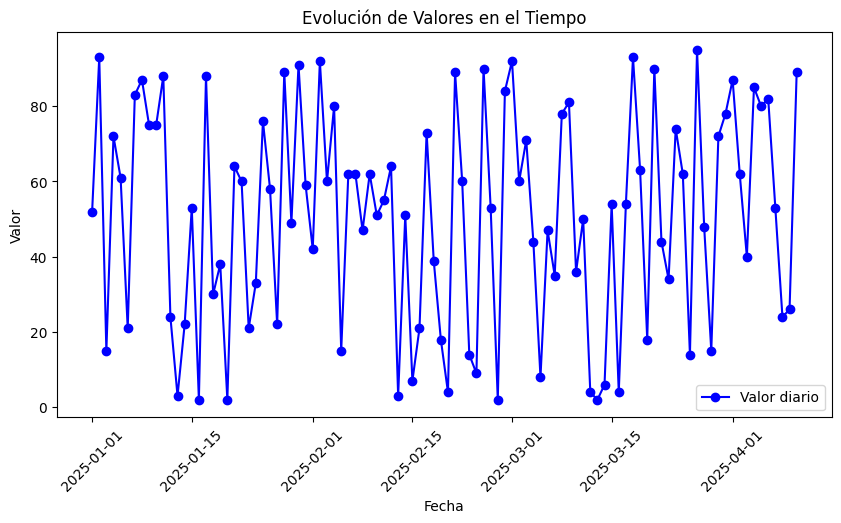

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df_tiempo["Fecha"], df_tiempo["Valor"], marker="o", linestyle="-", color="b", label="Valor diario")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Evolución de Valores en el Tiempo")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.legend()
plt.show()

Como abrir un dataset desde google colab

In [17]:
# google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
df = pd.read_csv('/content/drive/MyDrive/ejemplo/maiz-serie-1923-2023-anual.csv')

In [28]:
df.head()

,indice_tiempo,superficie_sembrada_maiz_ha,superficie_cosechada_maiz_ha,produccion_maiz_t,rendimiento_maiz_kgxha
0,1923,3435430,NaN,7030000,NaN
1,1924,3707700,2911768.0,4732235,1421.29
2,1925,4297000,3898912.0,8170000,1788.59
3,1926,4289000,3666650.0,8150000,1741.61
4,1927,4346000,3641826.0,7915000,1789.96


In [19]:
!ls /content/drive/MyDrive/ejemplo

maiz-serie-1923-2023-anual.csv


In [ ]:
/content/drive/MyDrive/ejemplo/maiz-serie-1923-2023-anual.csv

In [22]:
df.head()

,indice_tiempo,superficie_sembrada_maiz_ha,superficie_cosechada_maiz_ha,produccion_maiz_t,rendimiento_maiz_kgxha
0,1923,3435430,NaN,7030000,NaN
1,1924,3707700,2911768.0,4732235,1421.29
2,1925,4297000,3898912.0,8170000,1788.59
3,1926,4289000,3666650.0,8150000,1741.61
4,1927,4346000,3641826.0,7915000,1789.96


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   indice_tiempo                 101 non-null    int64  
 1   superficie_sembrada_maiz_ha   101 non-null    int64  
 2   superficie_cosechada_maiz_ha  100 non-null    float64
 3   produccion_maiz_t             101 non-null    int64  
 4   rendimiento_maiz_kgxha        100 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 4.1 KB


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ejemplo/maiz-serie-1923-2023-anual.xlsx',sheet_name='Hoja1')